# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation.

In [0]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [0]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss =  signal.convolve2d(image,gaussFilter , boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image,sobelX , boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image,sobelY , boundary='symm', mode='same')

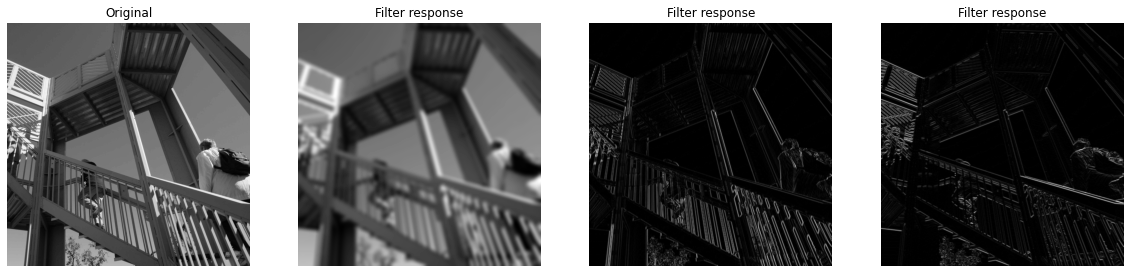

In [3]:
# Show filter responses
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


Answer 1. Impact of 3 filters on image are listed below :
a. Gaussian filter blurs/ smoothens the image.
b. SobelX detects the object in X- plane
c. SobelY detects the object in Y-plane  

Answer 2: Please see below 

Answer 3: Please see below 

Answer 4: Please see below 

Answer 5 : Please see below for filter size.  Valid filter has no padding and drops the last convolution if the dimensions doesn't match.This means Pixels on the edges processed by fewer filters than the pixels on the inner side.Higher the size of filter, the noise reduction is more but will also remove the desired attributeds more. Hence, an optimum size of filter is preferred.

Answer 6 : In case of valid convolution, the size of the volumes would reduce by a small amount after each layer, and the information at the borders would be removed quickly.This is a problem for CNNs with many layers.



In [4]:
# Your code for checking sizes of image and filter responses 
print ("The sizes of image is :" ,image.shape)
print ("The original filter size of Gaussian is :" ,gaussFilter.shape)
print ("The original filter size of SobelX is :" ,sobelX.shape)
print ("The original filter size of SobelY is :" ,sobelY.shape)

#For mode='same'
print ("The Gaussian filter response size for mode='same' is :" ,filterResponseGauss.shape)
print ("The sobelX filter response size for mode='same' is :" ,filterResponseSobelX.shape)
print ("The sobelY filter response size  for mode='same' is :" ,filterResponseSobelY.shape)

# For mode='valid'
filterResponseGauss_V =  signal.convolve2d(image,gaussFilter , boundary='symm', mode='valid')
filterResponseSobelX_V = signal.convolve2d(image,sobelX , boundary='symm', mode='valid')
filterResponseSobelY_V = signal.convolve2d(image,sobelY , boundary='symm', mode='valid')

print ("The Gaussian filter response size for mode='valid' is :" ,filterResponseGauss_V.shape)
print ("The sobelX filter response size for mode='valid' is :" ,filterResponseSobelX_V.shape)
print ("The sobelY filter response size for mode='valid' is :" ,filterResponseSobelY_V.shape)

The sizes of image is : (512, 512)
The original filter size of Gaussian is : (15, 15)
The original filter size of SobelX is : (3, 3)
The original filter size of SobelY is : (3, 3)
The Gaussian filter response size for mode='same' is : (512, 512)
The sobelX filter response size for mode='same' is : (512, 512)
The sobelY filter response size  for mode='same' is : (512, 512)
The Gaussian filter response size for mode='valid' is : (498, 498)
The sobelX filter response size for mode='valid' is : (510, 510)
The sobelY filter response size for mode='valid' is : (510, 510)


##  Part 3: Get a graphics card

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

Using TensorFlow backend.


##  Part 4: How fast is the graphics card?

Lets investigate how much faster a convolution is with the graphics card

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?

Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

Answer 7 : The size of filter respond to (h =Height, w= Width, d = Dimension). herein, 3 represents RGB values. It is therefore, the arrary of matrix is of size 1x3 and not 1x2.

Answer 8 : A  'Conv2D'layer scans a source image with a filter to extract required features. Yes, it is the standard 2D convolution which takes a three-dimensional input, typically an image with three color channels.

Answer 9. The answer is given below. At the moment of writing it is showing 60 times.

Answer 10 :GPU speedup over CPU: 2x.  It is 30 times lower than 100 images batch. The difference is because the higher images in batch , it requires lower run time as it is processed in big cluster.

In [6]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3 (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.8951834460000043
GPU (s):
0.1899991390000082
GPU speedup over CPU: 20x


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

170500096/170498071 [==============================] - 11s 0us/step
Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

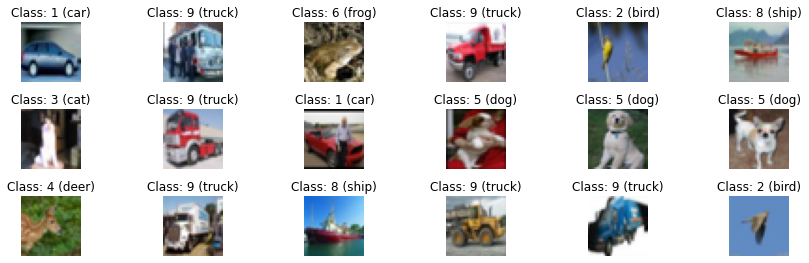

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

Xtrain,Xval,Ytrain, Yval = train_test_split(Xtrain,Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data


print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xval has size {}.'.format(Xval.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Xtest has size {}.'.format(Xtest.shape))

Xtrain has size (7500, 32, 32, 3).
Ytrain has size (7500, 1).
Xval has size (2500, 32, 32, 3).
Yval has size (2500, 1).
Xtest has size (2000, 32, 32, 3).


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [0]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/utils/#to_categorical

In [11]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print (Xtrain.shape, Ytrain.shape)
print (Xval.shape, Yval.shape,Ytest.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Yval = tf.keras.utils.to_categorical(Yval)
Ytest= tf.keras.utils.to_categorical(Ytest)

# Print shapes after converting the labels
print (Ytrain.shape, Yval.shape,Ytest.shape)

(7500, 32, 32, 3) (7500, 1)
(2500, 32, 32, 3) (2500, 1) (2000, 1)
(7500, 10) (2500, 10) (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [0]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):
    
    opt =keras.optimizers.Adam(learning_rate=learning_rate)
    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(n_filters, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    temp=n_filters*2
    for i in range(n_conv_layers-1):
       model.add(Conv2D(temp,kernel_size=(3,3),strides=(1, 1),padding ='same',activation='relu'))
       model.add(BatchNormalization())
       model.add(MaxPooling2D(pool_size=(2,2)))
       temp=temp*2

       
                               
    # Add flatten layer
    model.add(Flatten())
    # Add intermediate dense layers
    if n_dense_layers>0:
        for i in range(n_dense_layers):
            model.add(Dense(n_nodes,activation='relu'))
            model.add(BatchNormalization())
            if use_dropout==True:
                model.add(Dropout(0.5))
        
    # Add final dense layer
    model.add(Dense(10,activation='softmax')) # 10 nodes for final layer 
    # Compile model
    model.compile(loss=categorical_crossentropy,optimizer=opt,metrics=['accuracy'])

    return model

In [0]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()


## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

## 2 convolutional layers, no intermediate dense layers

In [0]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain,batch_size=100,epochs=20,verbose=0,validation_data=(Xval,Yval))

In [15]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,Ytest,batch_size=100) 
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

score_1 = model1.evaluate(Xtrain,Ytrain,batch_size=100) 
print('Train accuracy: %.4f' % score_1[1])

2000/2000 [==============================] - 0s 66us/step
Test loss: 3.0147
Test accuracy: 0.5305
7500/7500 [==============================] - 0s 65us/step
Train accuracy: 0.9332


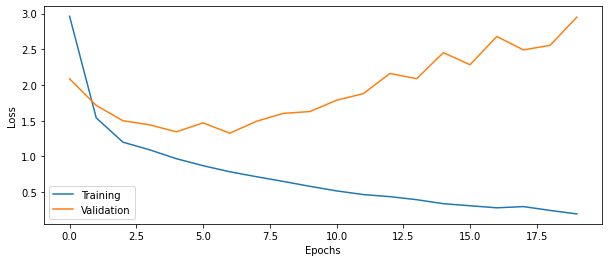

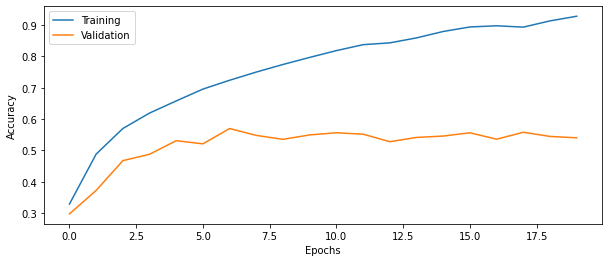

In [16]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance
Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 11: How big is the difference between training and test accuracy?

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

The test accuracy is 53.6 % . This is very low and can result in very high misclassification. We understand that the improvement is required for the classifier.

Answer 11. Above, we run the model for train and test The output is as below :
Test accuracy: 0.5360
Train accuracy: 0.9195

Answer 12. We worked on Google Colab for the report.

Answer 13. We used numerical datasets in DNN while we are using image datasets in CNN. Smaller image batch size  for CNN leads to a smaller number of iterations of a training algorithm, than a large batch size,which leads to a higher accuracy overall.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [0]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain,batch_size=100,epochs=20,verbose=0,validation_data=(Xval,Yval))

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest,Ytest,batch_size=100)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 72us/step
Test loss: 3.4449
Test accuracy: 0.5170


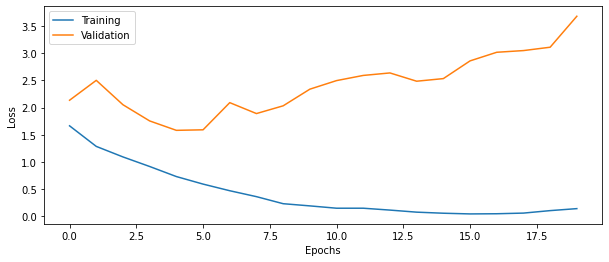

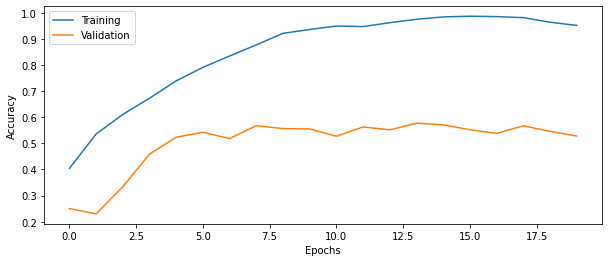

In [19]:
# Plot the history from the training run
plot_results(history2)


## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [0]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape =(32, 32, 3) 


# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_dense_layers=1,n_nodes=50,learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain,batch_size,epochs,verbose=0,validation_data=(Xval,Yval))

In [21]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest,Ytest,batch_size=100)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 80us/step
Test loss: 2.2865
Test accuracy: 0.5915


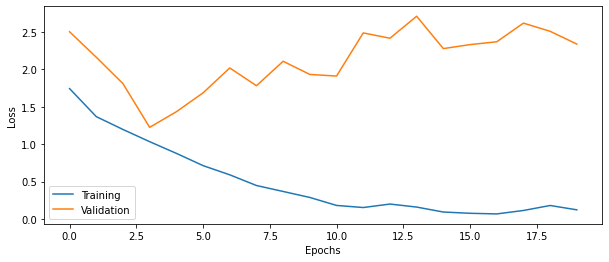

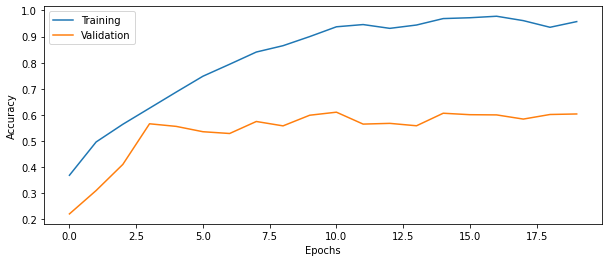

In [22]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 19: How does MaxPooling help in reducing the number of parameters to train?

Answer 14 :
Trainable params: 124,180. conv2d_8 (Conv2D) contains most of the parameters (73856) 

Answer 15: The input to the Cov2D layer is 32X32 images . The first layer has 16 filters with kernel_size=(3, 3). Input shape =(None, 32, 32, 16).
The output of  Cov2D layer is  image with 128 filters (None, 4, 4, 128).

Answer 16 . Yes,batch size is always the first dimension of each 4D tensor. 

Answer 17. The output is 128 channels.

Answer 18 : Each layer may or may not have parameters (eg . Relu doesnt have ) as well as additional hyperparameters but each layer will have set of weights(plus bias).Hence the number of parameters in each Conv2D layer not equal to the number of filters times the number of filter coefficients per filter (plus biases).

Answer 19. Max pooling helps in reducing the size of data in every layer.It basically down-sample an input representation (image etc), reducing its dimensionality and allowing for assumptions to be made about features. It therefore helps in reducing the number of parameters to train and therefore saves computational cost too.

In [23]:
# Print network architecture

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


Answer 20: With dropout (50%) , we are getting 60.9 % test accuracy , while without using dropout bwe are getting  57.7 % test accuracy. So we can conclude that using dropout , the test accuracy is increased by 3.2% overall.

Answer 21 : There are various types of regularization techniques .
-L2 and L1 regularization
-Dropout
-Data augmentation
-Early stopping
We can apply L2 regularization to any layer using the regularizers. For example:
adding it to dense layer , we have 
model.add(Dense(filters, input_dim,
                kernel_regularizer=regularizers.l2(lambda)  # where lambda is regularizing parameter 

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [0]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)


# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain,batch_size=100,epochs=20,verbose=0,validation_data=(Xval,Yval))

In [25]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest,batch_size=100)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 81us/step
Test loss: 2.2526
Test accuracy: 0.5865


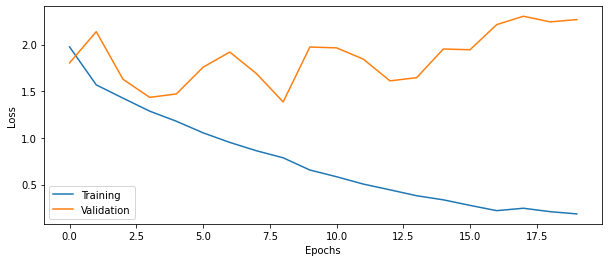

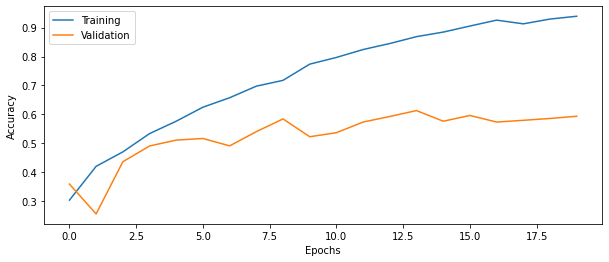

In [26]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

Answer 22: Please see below 

## Your best config

In [0]:
# Setup some training parameters

# Build model
model5 =build_CNN(input_shape, n_conv_layers=4, n_filters=64, n_dense_layers=1, n_nodes=100, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain,batch_size=50,epochs=20,verbose=0,validation_data=(Xval,Yval))

In [28]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest,batch_size=50)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 239us/step
Test loss: 2.0860
Test accuracy: 0.6160


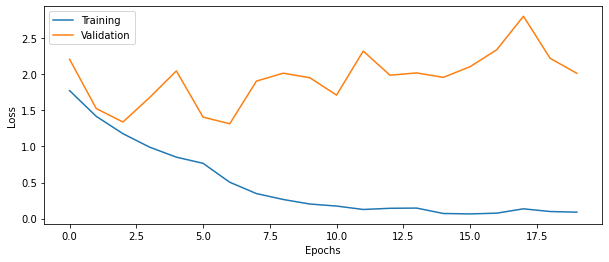

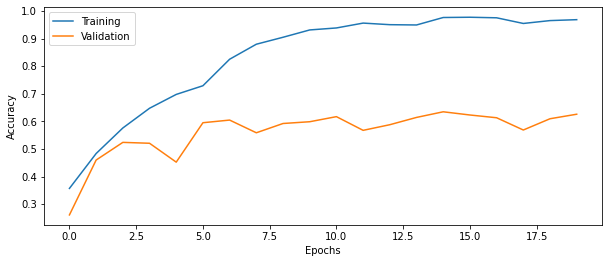

In [29]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

Answer 23 : We are getting test accuracy around 21% with rotation. The test accuracy without rotation is approx. 60%. This is because we have  trained the network to identify the object in the image when the image is not rotated.  

In [0]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

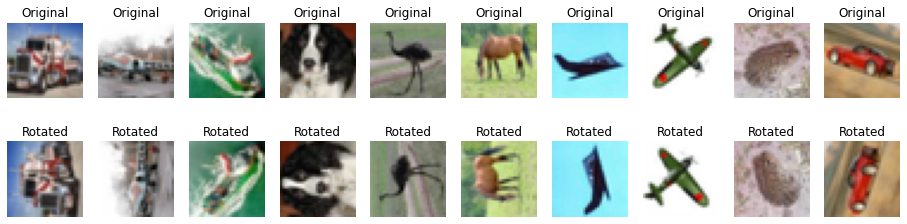

In [31]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [32]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated ,Ytest,batch_size=50)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 257us/step
Test loss: 6.7789
Test accuracy: 0.2125


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/

In [0]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [0]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    vertical_flip=True,
    horizontal_flip=True,
    )


# Setup a flow for training data, assume that we can fit all images into CPU memory
train_flow=datagen.flow(Xtrain,Ytrain, subset='training',batch_size=50)
# Setup a flow for validation data, assume that we can fit all images into CPU memory

validation_flow=datagen.flow(Xtrain,Ytrain,subset='validation',batch_size=50)


## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

Answer 24: We can load the images from HDD but it will be slower, by using flow_from_directory. 

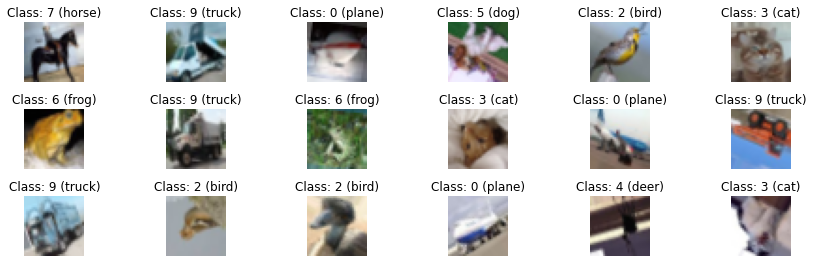

In [35]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/models/model/ for how to use model.fit_generator instead of model.fit for training

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 26: What other types of image augmentation can be applied, compared to what we use here?

Answer 25 : The test accuracy on rotated images without augmentation is around 19.2% whereas after augmentation it has increased over 33% . This is a big jump from the 21 %. We can change epoch (parameter)for more training. 

Answer 26 : We have used rotation range of 30 degrees, horizontal and vertical flipping. The other augumentation are color space transformation, noise injection, random erasing,GAN based augumentation etc.

In [36]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain[0].shape

# Build model (your best config)
model6 =build_CNN(input_shape, n_conv_layers=4, n_filters=64, n_dense_layers=1, n_nodes=100, use_dropout=False, learning_rate=0.01)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit_generator(train_flow,
                    steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size,
                    epochs=200,
                    validation_data=validation_flow,
                    validation_steps = len(Xtrain)*validation_split/batch_size)

Epoch 1/200
80/80 [==============================] - 5s 62ms/step - loss: 2.0904 - accuracy: 0.2623 - val_loss: 2.9614 - val_accuracy: 0.2150
Epoch 2/200
80/80 [==============================] - 4s 50ms/step - loss: 1.8364 - accuracy: 0.3288 - val_loss: 2.4690 - val_accuracy: 0.1970
Epoch 3/200
80/80 [==============================] - 4s 51ms/step - loss: 1.7267 - accuracy: 0.3677 - val_loss: 1.9341 - val_accuracy: 0.3110
Epoch 4/200
80/80 [==============================] - 4s 51ms/step - loss: 1.6668 - accuracy: 0.3840 - val_loss: 1.9976 - val_accuracy: 0.3810
Epoch 5/200
80/80 [==============================] - 4s 51ms/step - loss: 1.5880 - accuracy: 0.4140 - val_loss: 1.7469 - val_accuracy: 0.3940
Epoch 6/200
80/80 [==============================] - 4s 51ms/step - loss: 1.5535 - accuracy: 0.4257 - val_loss: 1.6967 - val_accuracy: 0.3510
Epoch 7/200
80/80 [==============================] - 4s 51ms/step - loss: 1.4729 - accuracy: 0.4605 - val_loss: 1.4846 - val_accuracy: 0.4300
Epoch 

In [37]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.5002
Test accuracy: 0.6755
Test loss: 4.2705
Test accuracy: 0.3260


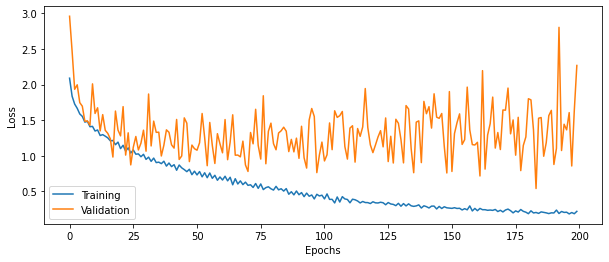

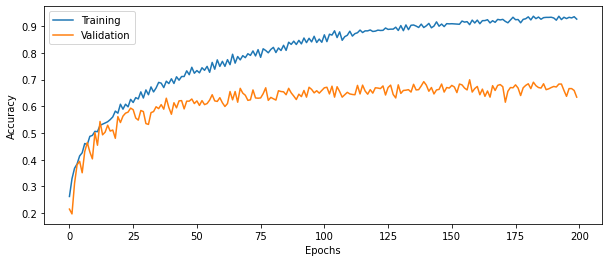

In [38]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly

In [0]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=1)

miss = np.flatnonzero(y_correct != y_pred)

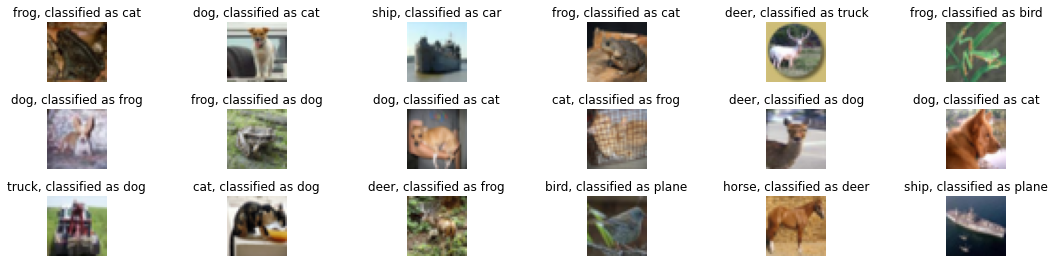

In [40]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer 27 : The accuracy will drop if we use different scale (other than 32 x 32) to this trained convolutional layers. But we can't apply the CNN with dense layer to images of another size. 

Answer 28. No, There is no direct way as of now that design a CNN that can be trained on images of one size, and then applied to an image of any size. But without dense layers, only convolutional CNN can be applied. 

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database. Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 

Question 30: How many trainable parameters does the ResNet50 network have? 

Question 31: What is the size of the images that ResNet50 expects as input?

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/applications/#resnet

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


Answer 29 : ResNet50 has 5 convolutional layers.

Answer 30 : Trainable params: 25,583,592.

Answer 31 : the size of the images that ResNet50 expects as input is (224, 224, 3)

Answer 32 : Second derivative is used to undersatnd the rate of change of derivatives. It is particularly used as a fast feedback loop which helps us to tweak our hyperparameters in advance, so that we may apply correction or refinement method to avoid loss of time,resounces and cost.

In [41]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')


img_path1 = '/content/drive/My Drive/Images/elephant.jpg'
img_path2 ='/content/drive/My Drive/Images/aeroplane.jpg'
img_path3 = '/content/drive/My Drive/Images/house.jpg'
img_path4 ='/content/drive/My Drive/Images/lion.jpg'
img_path5 ='/content/drive/My Drive/Images/woman.jpg'

img_list=[img_path1,img_path2,img_path3,img_path4,img_path5]
for img_path in img_list:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # predicting top 3 predictions 
    print('Predicted:', decode_predictions(preds, top=3)[0])



In [0]:
model.summary()
